In [37]:
from ast import Return
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#variables
dataFile = 'pricedata.csv'
instrument = 'ES1 Index'
short_window = 50
long_window = 250

pd.set_option('display.width', 1000)


In [38]:
# df = pd.read_csv(f'data/{dataFile}', parse_dates=True, index_col='Date')
# df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df = pd.read_csv(f'input_data/{dataFile}')
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y", dayfirst=True, errors='raise')
df = df.set_index('Date').sort_index()
print(df)



            GC1 Comdty  ES1 Index  GBPUSD Curncy  VG1 Index
Date                                                       
2010-01-04      1118.3    1128.75         1.6085     3015.0
2010-01-05      1118.7    1132.25         1.5992     3011.0
2010-01-06      1136.5    1133.00         1.6019     3006.0
2010-01-07      1133.7    1137.50         1.5933     3007.0
2010-01-08      1138.9    1141.50         1.6023     3018.0
...                ...        ...            ...        ...
2025-06-26      3333.5    6195.00         1.3728     5261.0
2025-06-27      3287.6    6223.75         1.3716     5338.0
2025-06-30      3307.7    6253.75         1.3732     5327.0
2025-07-01      3349.8    6248.75         1.3746     5304.0
2025-07-02      3350.8    6259.75         1.3586     5324.0

[4043 rows x 4 columns]


In [39]:
df['MA50'] = df[instrument].rolling(window=short_window, min_periods=short_window).mean()
df['MA250'] = df[instrument].rolling(window=long_window, min_periods=long_window).mean()
print(df)

            GC1 Comdty  ES1 Index  GBPUSD Curncy  VG1 Index       MA50       MA250
Date                                                                              
2010-01-04      1118.3    1128.75         1.6085     3015.0        NaN         NaN
2010-01-05      1118.7    1132.25         1.5992     3011.0        NaN         NaN
2010-01-06      1136.5    1133.00         1.6019     3006.0        NaN         NaN
2010-01-07      1133.7    1137.50         1.5933     3007.0        NaN         NaN
2010-01-08      1138.9    1141.50         1.6023     3018.0        NaN         NaN
...                ...        ...            ...        ...        ...         ...
2025-06-26      3333.5    6195.00         1.3728     5261.0  5834.6892  5800.91704
2025-06-27      3287.6    6223.75         1.3716     5338.0  5852.9092  5803.15304
2025-06-30      3307.7    6253.75         1.3732     5327.0  5874.2892  5805.43604
2025-07-01      3349.8    6248.75         1.3746     5304.0  5892.9692  5807.56204
2025

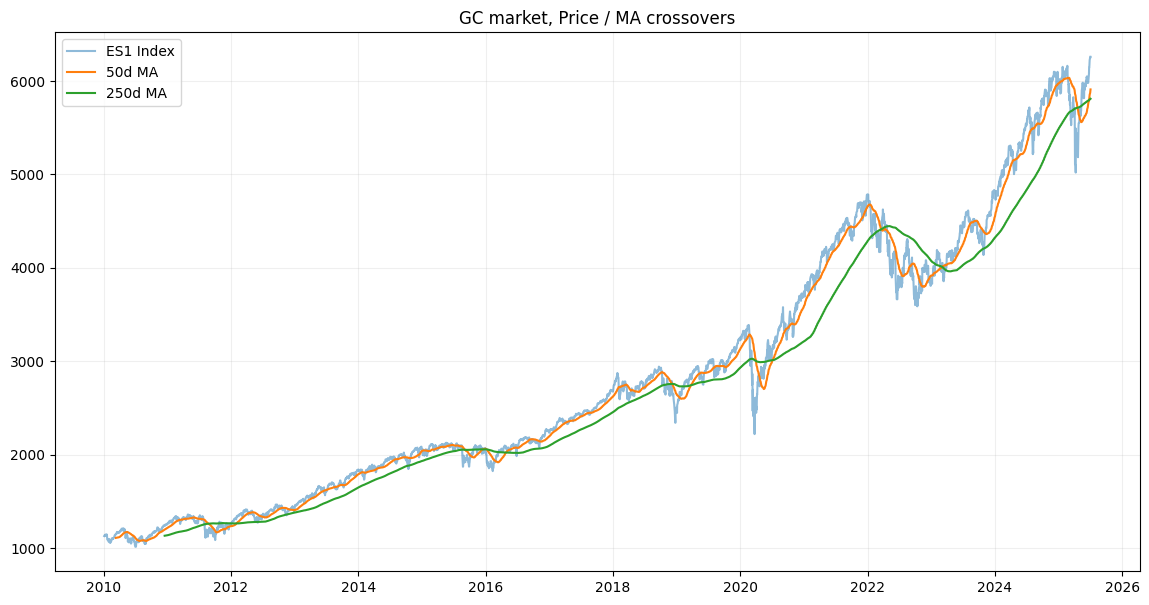

In [40]:
plt.figure(figsize=(14,7))

# Plot the data
plt.plot(df[instrument], label=instrument, alpha=0.5)
plt.plot(df['MA50'], label="50d MA")
plt.plot(df['MA250'], label="250d MA")

# Add plot styling
plt.title("GC market, Price / MA crossovers")
plt.grid(True, alpha=0.2)
plt.legend()

# Display the plot
plt.show()

In [41]:
# generate position (IsLong)
df['Position'] = np.select([
    df["MA50"]>df["MA250"], df["MA250"]<df["MA50"]],
    [1,-1], default=0
)

df['Position'] = df['Position'].replace(0, np.nan).ffill().fillna(0)
print(df)

            GC1 Comdty  ES1 Index  GBPUSD Curncy  VG1 Index       MA50       MA250  Position
Date                                                                                        
2010-01-04      1118.3    1128.75         1.6085     3015.0        NaN         NaN       0.0
2010-01-05      1118.7    1132.25         1.5992     3011.0        NaN         NaN       0.0
2010-01-06      1136.5    1133.00         1.6019     3006.0        NaN         NaN       0.0
2010-01-07      1133.7    1137.50         1.5933     3007.0        NaN         NaN       0.0
2010-01-08      1138.9    1141.50         1.6023     3018.0        NaN         NaN       0.0
...                ...        ...            ...        ...        ...         ...       ...
2025-06-26      3333.5    6195.00         1.3728     5261.0  5834.6892  5800.91704       1.0
2025-06-27      3287.6    6223.75         1.3716     5338.0  5852.9092  5803.15304       1.0
2025-06-30      3307.7    6253.75         1.3732     5327.0  5874.2892

In [42]:
# get returns
df['Returns'] = df[instrument].pct_change()
print()

In [43]:
# df = df.loc['24/06/2025':'27/06/2025']
df = df.loc['2025':]
print(df)


df['StrategyReturn'] = df['Position'].shift(1) * df['Returns']
df.loc[df['Position'].shift(1) == 0, df['StrategyReturn']] = 0

initial_capital = 10000

df['Capital'] = initial_capital * (1+df['StrategyReturn']).cumprod()
print(df['Capital'])

            GC1 Comdty  ES1 Index  GBPUSD Curncy  VG1 Index       MA50       MA250  Position   Returns
Date                                                                                                  
2025-01-01      2641.0    5935.75         1.2517     4881.0  5975.3402  5492.46424       1.0  0.000000
2025-01-02      2669.0    5916.50         1.2380     4932.0  5976.6902  5496.88524       1.0 -0.003243
2025-01-03      2654.7    5989.50         1.2423     4888.0  5979.5602  5501.36524       1.0  0.012338
2025-01-06      2647.4    6020.50         1.2520     5006.0  5982.7402  5505.92324       1.0  0.005176
2025-01-07      2665.4    5954.25         1.2477     5035.0  5984.4052  5510.16024       1.0 -0.011004
...                ...        ...            ...        ...        ...         ...       ...       ...
2025-06-26      3333.5    6195.00         1.3728     5261.0  5834.6892  5800.91704       1.0  0.007809
2025-06-27      3287.6    6223.75         1.3716     5338.0  5852.9092  5

C:\Users\abithal\AppData\Local\Temp\1\ipykernel_12660\534293557.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Capital'] = initial_capital * (1+df['StrategyReturn']).cumprod()


In [44]:
# output results - df.to_csv('output.csv',index=false)